In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [ ]:
!pip install SciencePlots

In [72]:
import geopandas
from geopandas import GeoDataFrame
import geoplot
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import copy
import matplotlib.cm as cm
import matplotlib.patches as mpatches
plt.style.use(['science','no-latex'])
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["ytick.left"] = False

In [ ]:
ovarall_file = 'observation.json'
with open(ovarall_file) as json_file:
    overall = json.load(json_file)

geojsons = os.listdir('map/')
locations = pd.DataFrame(columns=('cases', 'district', 'geometry'))
i = 0
for file in geojsons:
  if file.endswith('geojson'):
    df = geopandas.read_file(f'map/{file}')
    district = file.split('.')[0].capitalize() 
    upper_case = district.upper()
    cases = overall[upper_case]
    locations.loc[i] = [cases, district, df.iloc[0, 0]]
    i += 1
  # if i == 2:
  #   break
locations["cases"] = pd.to_numeric(locations["cases"])
gdf = GeoDataFrame(locations, crs="EPSG:4326")
# Project to NAD83 projected crs
gdf = gdf.to_crs(epsg=4326)

# Access the centroid attribute of each polygon
gdf['centroid'] = gdf.centroid

In [118]:
seeds = ['Western', 'Pujehun', 'Tonkolili', 'Gueckedou']
important = ["Kindia", 'Nimba', "Port_loko", 'Conakry', 'Bo', "Kailahun", 'Kankan']
gdf.head()

,cases,district,geometry,centroid
0,94,Lofa,GEOMETRYCOLLECTION (MULTIPOLYGON (((-10.60517 ...,POINT (-9.85879 7.99409)
1,146,Kono,GEOMETRYCOLLECTION (MULTIPOLYGON (((-11.36085 ...,POINT (-10.94076 8.69477)
2,94,Nzerekore,GEOMETRYCOLLECTION (MULTIPOLYGON (((-10.68541 ...,POINT (-8.86613 8.42339)
3,121,Coyah,GEOMETRYCOLLECTION (MULTIPOLYGON (((-13.41040 ...,POINT (-13.38276 9.70108)
4,106,Kailahun,GEOMETRYCOLLECTION (MULTIPOLYGON (((-10.92542 ...,POINT (-10.70582 8.08923)


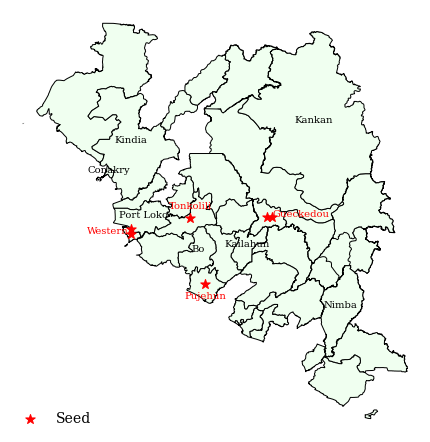

In [119]:
cmap = matplotlib.cm.get_cmap('Spectral', 50)
gdf.plot(figsize = (8,8), edgecolor = 'k', linewidth = 1, color = 'honeydew')
for idx, row in gdf.iterrows():
  if row['district'] in important:
    if row['district'] == 'Port_loko':
      plt.annotate(s='Port Loko', xy = (row['centroid'].x , row['centroid'].y), ha='center', color = 'k', fontsize = 10)
    else:
      plt.annotate(s=row['district'], xy = (row['centroid'].x , row['centroid'].y), ha='center', color = 'k', fontsize = 10)
  if row['district'] == 'Western':
    plt.annotate(s=row['district'], xy = (row['centroid'].x - 0.5, row['centroid'].y), ha='center', color = 'r', fontsize = 10)
    plt.scatter(row['centroid'].x,row['centroid'].y , marker='*', color= 'r', s = 100)
    plt.scatter(row['centroid'].x ,row['centroid'].y + 0.1 , marker='*', color= 'r', s = 100)
  elif  row['district'] == 'Gueckedou':
    plt.annotate(s=row['district'], xy = (row['centroid'].x + 0.7, row['centroid'].y), ha='center', color = 'r', fontsize = 10)
    plt.scatter(row['centroid'].x,row['centroid'].y , marker='*', color= 'r', s = 100)
    plt.scatter(row['centroid'].x + 0.1,row['centroid'].y , marker='*', color= 'r', s = 100)
  elif row['district'] == 'Pujehun':
    plt.annotate(s=row['district'], xy = (row['centroid'].x, row['centroid'].y - 0.3), ha='center', color = 'r', fontsize = 10)
    plt.scatter(row['centroid'].x,row['centroid'].y , marker='*', color= 'r', s = 100)
  elif row['district'] == 'Tonkolili':
    plt.annotate(s=row['district'], xy = (row['centroid'].x, row['centroid'].y + 0.2), ha='center', color = 'r', fontsize = 10)
    plt.scatter(row['centroid'].x,row['centroid'].y , marker='*', color= 'r', s = 100, label = 'Seed')
plt.yticks([])
plt.xticks([])
plt.legend(loc='lower left', fontsize = 14)
# plt.ylabel('Latitude')
# plt.xlabel('Longitude')
# plt.savefig('ebola_map_seed.pdf')

In [101]:
def get_color(number):
  if 400 <= number:
    return 'darkred'
  elif 350 <= number < 400:
    return 'red'
  elif 300 <= number < 350:
    return 'orangered'
  elif 250 <= number < 300:
    return 'darkorange'
  elif 200 <= number < 250:
    return 'orange'
  elif 150 <= number < 200:
    return 'gold'
  elif 100 <= number < 150:
    return 'yellow'
  elif 50 <= number < 100:
    return 'yellowgreen'
  elif number < 50:
    return 'green'
  
legend_colors = ['darkred', 'red', 'orangered', 'darkorange', 'orange', 'gold', 'yellow', 'green', 'darkgreen']

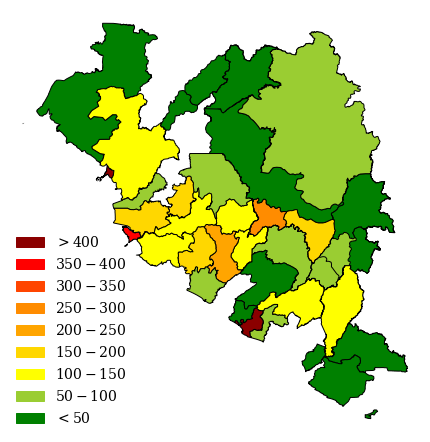

In [117]:
# minima = min(cases)
# maxima = max(cases)
# norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
# mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdYlGn)

# for v in cases:
#     colors.append(matplotlib.colors.rgb2hex(mapper.to_rgba(v)[:3]))
cases = gdf['cases'].to_numpy() 
colors = [get_color(cases[i]) for i in range(len(cases))]
new_gdf = copy.deepcopy(gdf)
new_gdf['color']=colors
new_gdf.plot(figsize=(8,8),edgecolor = 'k', linewidth = 1, color = new_gdf['color'])
plt.yticks([])
plt.xticks([])
handles, labels = plt.gca().get_legend_handles_labels()
patch1 = mpatches.Patch(color='darkred', label='$>400$')  
patch2 = mpatches.Patch(color='red', label='$350 - 400$')  
patch3 = mpatches.Patch(color='orangered', label='$300 - 350$')  
patch4 = mpatches.Patch(color='darkorange', label='$250 - 300$')  
patch5 = mpatches.Patch(color='orange', label='$200 - 250$')  
patch6 = mpatches.Patch(color='gold', label='$150 - 200$')  
patch7 = mpatches.Patch(color='yellow', label='$100 - 150$')  
patch8 = mpatches.Patch(color='yellowgreen', label='$50 - 100$')  
patch9 = mpatches.Patch(color='green', label='$<50$')  
handles.extend([patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9]) 
plt.legend(handles=handles, loc='lower left', fontsize = 14)
# plt.savefig('ebola_map_observation.pdf')